In [1]:
pip list

Package                      Version
---------------------------- -----------
absl-py                      1.1.0
aiohttp                      3.8.1
aiosignal                    1.2.0
albumentations               1.2.1
antlr4-python3-runtime       4.9.3
astunparse                   1.6.3
async-timeout                4.0.2
asynctest                    0.13.0
attrs                        21.4.0
backcall                     0.2.0
cachetools                   5.2.0
catboost                     1.0.6
certifi                      2022.5.18.1
charset-normalizer           2.0.12
cloudpickle                  2.1.0
cycler                       0.11.0
debugpy                      1.6.2
decorator                    5.1.1
effdet                       0.3.0
entrypoints                  0.4
flatbuffers                  2.0
fonttools                    4.34.4
frozenlist                   1.3.0
fsspec                       2022.5.0
gast                         0.4.0
google-auth                  2.8.0
go

In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

In [4]:
path = '/home/centos/suhyeok/hotelrecommendation/input/'
train_df = pd.read_csv(path+'train.csv',nrows=10000)
test_df = pd.read_csv(path+'test.csv',nrows=10000)
dest_df = pd.read_csv(path+'destinations.csv',nrows=100000)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  10000 non-null  object 
 1   site_name                  10000 non-null  int64  
 2   posa_continent             10000 non-null  int64  
 3   user_location_country      10000 non-null  int64  
 4   user_location_region       10000 non-null  int64  
 5   user_location_city         10000 non-null  int64  
 6   orig_destination_distance  6271 non-null   float64
 7   user_id                    10000 non-null  int64  
 8   is_mobile                  10000 non-null  int64  
 9   is_package                 10000 non-null  int64  
 10  channel                    10000 non-null  int64  
 11  srch_ci                    9993 non-null   object 
 12  srch_co                    9993 non-null   object 
 13  srch_adults_cnt            10000 non-null  int6

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   date_time                  10000 non-null  object 
 2   site_name                  10000 non-null  int64  
 3   posa_continent             10000 non-null  int64  
 4   user_location_country      10000 non-null  int64  
 5   user_location_region       10000 non-null  int64  
 6   user_location_city         10000 non-null  int64  
 7   orig_destination_distance  5893 non-null   float64
 8   user_id                    10000 non-null  int64  
 9   is_mobile                  10000 non-null  int64  
 10  is_package                 10000 non-null  int64  
 11  channel                    10000 non-null  int64  
 12  srch_ci                    10000 non-null  object 
 13  srch_co                    10000 non-null  obje

In [7]:
train_df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [69]:
test_df.head()

,id,posa_continent,user_location_country,orig_destination_distance,is_mobile,is_package,channel,hotel_continent,hotel_country,hotel_market,stay_dur,no_of_days_bet_booking,Cin_day,Cin_month,Cin_year
0,0,3,66,5539.0567,1,0,3,6,204,27,4.0,258.0,19,5,2016
1,1,3,66,5873.2923,1,0,10,6,204,1540,3.0,230.0,12,5,2016
2,2,3,66,3975.9776,0,0,1,2,50,699,1.0,48.0,26,7,2015
3,3,3,66,1508.5975,0,1,10,2,50,628,2.0,-1.0,14,9,2015
4,4,3,66,66.7913,0,0,0,2,50,538,1.0,4.0,22,7,2015


In [8]:
train_df.shape

(10000, 24)

In [9]:
test_df.shape

(10000, 22)

In [10]:
#Plot
bookings_df = train_df[train_df["is_booking"]==1]
bookings_df

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
20,2014-02-27 18:01:32,2,3,66,318,52078,NaN,756,0,1,...,0,1,8291,1,1,1,2,50,191,2
27,2013-06-15 15:38:05,30,4,195,548,56440,NaN,1048,0,1,...,0,1,1385,1,1,1,0,185,185,58
72,2014-11-23 18:02:20,30,4,195,991,47725,NaN,1048,0,0,...,0,1,8803,1,1,1,3,151,69,36
79,2014-01-03 16:30:17,2,3,66,462,41898,2454.8588,1482,0,1,...,0,2,12009,1,1,1,2,50,680,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9946,2014-04-17 18:20:27,2,3,66,448,53078,97.2408,54163,0,0,...,0,1,12277,6,1,1,2,50,191,28
9953,2014-05-08 11:35:50,2,3,66,448,53593,153.7727,54163,0,0,...,1,1,12279,6,1,1,2,50,191,28
9964,2014-08-11 11:26:40,2,3,66,331,41804,359.1978,54163,0,0,...,0,2,12576,5,1,1,2,50,676,33
9974,2014-08-12 09:29:46,2,3,66,331,41804,96.6569,54163,0,0,...,1,1,11994,6,1,1,2,50,694,72


/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='hotel_country', ylabel='count'>

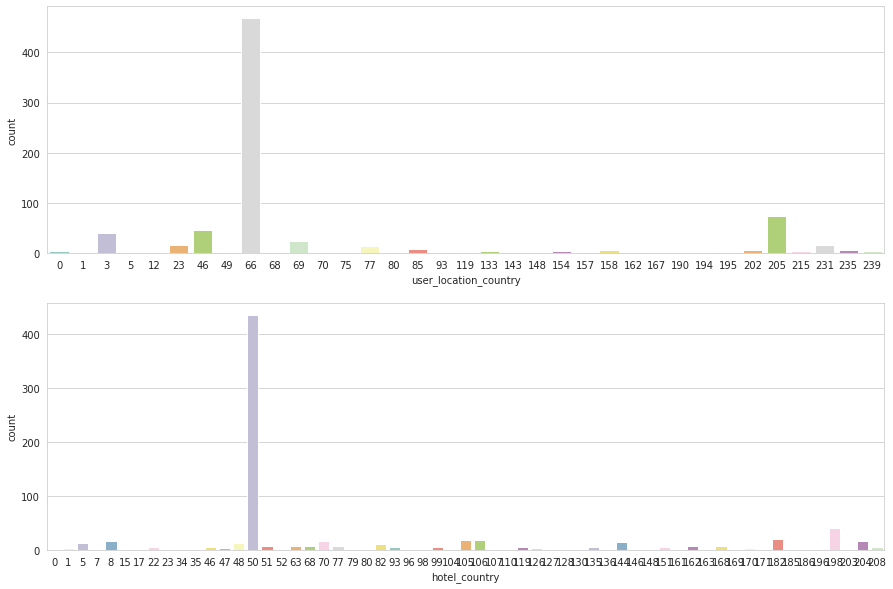

In [11]:
fig, (axis1,axis2)=plt.subplots(2,1,figsize=(15,10))

#What are the most countries the customer travle from?
sns.countplot('user_location_country',data=bookings_df.sort_values(by=['user_location_country']),ax=axis1,palette="Set3")

#What are the most countries the customer travle to?
sns.countplot('hotel_country',data=bookings_df.sort_values(by=['hotel_country']),ax=axis2,palette="Set3")

<AxesSubplot:>

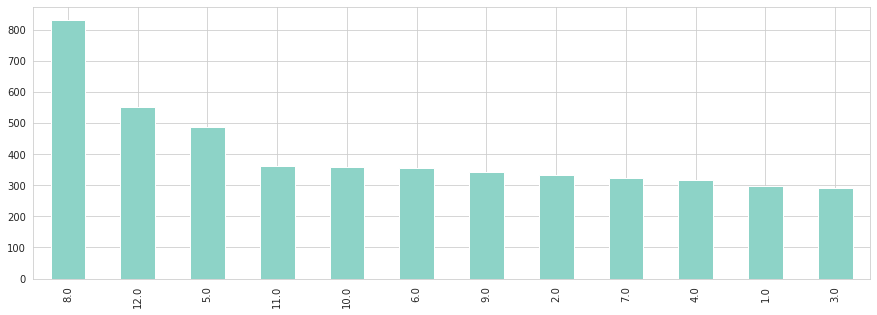

In [77]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,10))
train_df[train_df["hotel_country"]==50].Cin_month.value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

<AxesSubplot:>

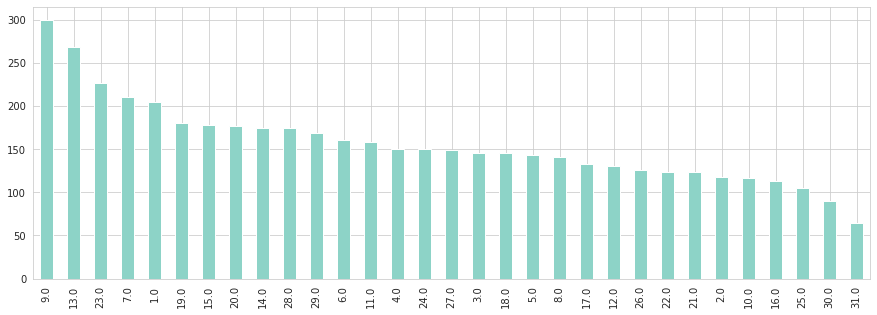

In [89]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,10))
train_df[train_df["hotel_country"]==50].Cin_day.value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

<AxesSubplot:>

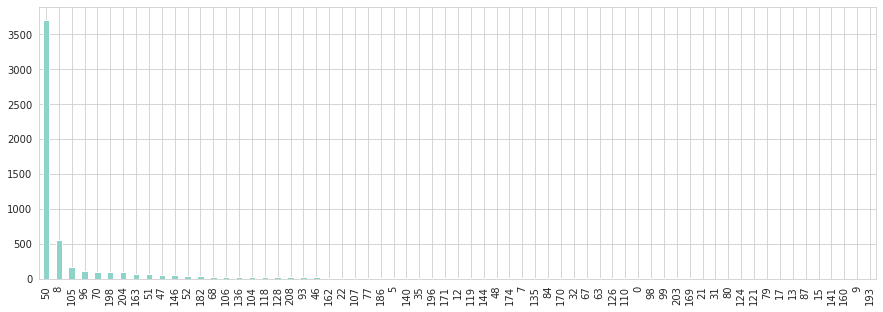

In [12]:
#Where do most of the customers from a country travel?
user_country_id = 66
fig, (axis1) = plt.subplots(1,1,figsize=(15,10))
country_customers = train_df[train_df["user_location_country"] == user_country_id]
country_customers["hotel_country"].value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

<AxesSubplot:>

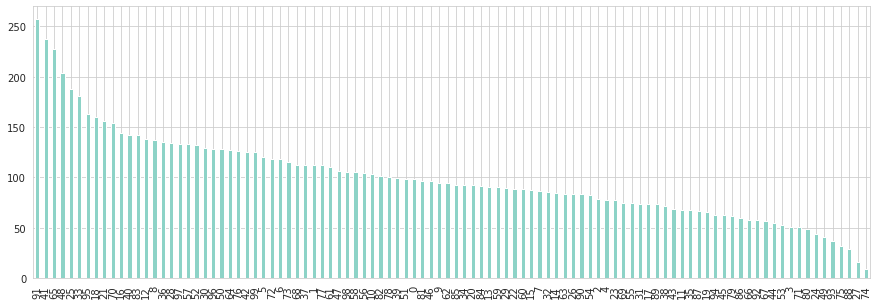

In [72]:
# Plot frequency for each hotel_clusters
train_df["hotel_cluster"].value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

<AxesSubplot:>

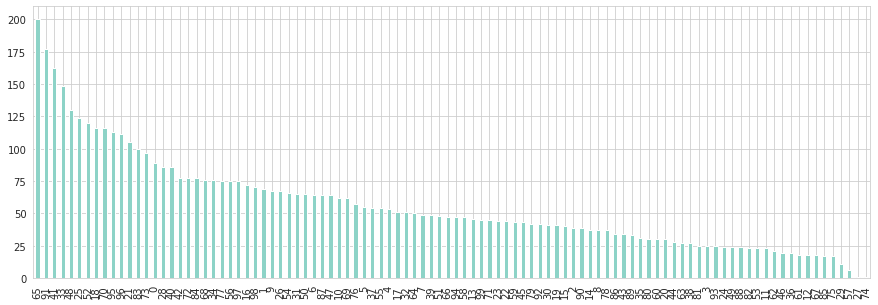

In [71]:
# What are the most frequent hotel clusters booked by customers from a country?
fig,(axis1) = plt.subplots(1,1,figsize=(15,10))
customer_clusters = train_df[train_df["user_location_country"] == user_country_id]["hotel_cluster"]
customer_clusters.value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

<AxesSubplot:>

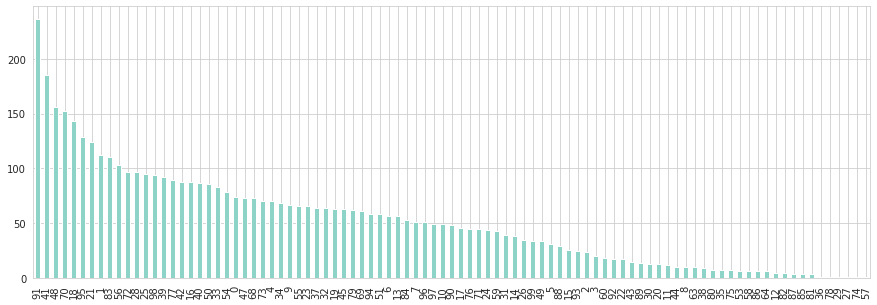

In [15]:
# What are the most frequent hotel clusters in a country?
country_id = 50
fig,(axis1) = plt.subplots(1,1,figsize=(15,10))
country_clusters = train_df[train_df["hotel_country"] == country_id]["hotel_cluster"]
country_clusters.value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

<AxesSubplot:xlabel='hotel_continent', ylabel='count'>

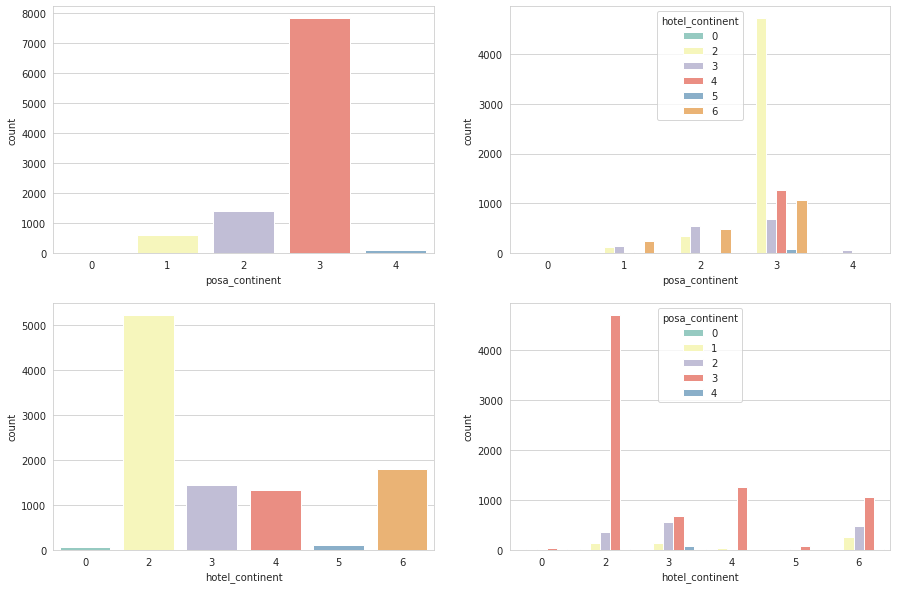

In [16]:
# Plot post_continent & hotel_continent
fig, ((axis1, axis2),(axis3,axis4)) = plt.subplots(2,2,figsize=(15,10))

# Plot frequency for each posa_continent
sns.countplot('posa_continent', data = train_df,order=[0,1,2,3,4], palette="Set3",ax=axis1)

# Plot frequency for each posa_continent decomposed by hotel_continent
sns.countplot('posa_continent', hue='hotel_continent', data=train_df, order=[0,1,2,3,4],palette="Set3",ax=axis2)

# Plot frequency for each hotel_continent
sns.countplot('hotel_continent', data=train_df, order=[0,2,3,4,5,6],palette="Set3",ax=axis3)

# Plot frequency for each hotel_continent decomposed by posa_continent
sns.countplot('hotel_continent', hue='posa_continent', data=train_df, order=[0,2,3,4,5,6], palette="Set3",ax=axis4)

<AxesSubplot:xlabel='is_package', ylabel='count'>

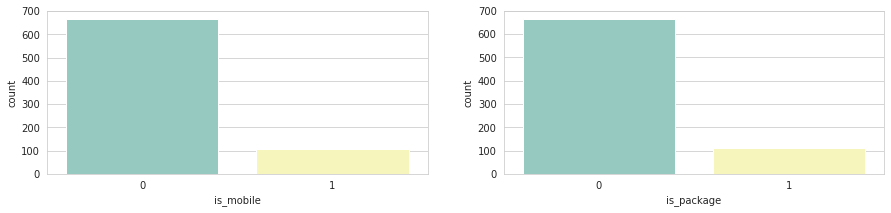

In [17]:
fig,(axis1, axis2) = plt.subplots(1,2,figsize=(15,3))

# What's the frequency of bookings through mobile?
sns.countplot(x='is_mobile', data=bookings_df, order=[0,1],palette="Set3",ax=axis1)

# What's the frequency of bookings with package?
sns.countplot(x='is_package',data=bookings_df,order=[0,1],palette="Set3",ax=axis2)

<AxesSubplot:xlabel='channel', ylabel='count'>

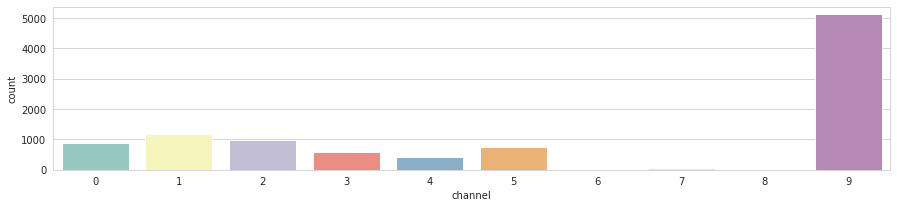

In [18]:
# What's the most impactful channel?
fig,(axis1) = plt.subplots(1,1,figsize=(15,3))
sns.countplot(x='channel', order=list(range(0,10)), data=train_df, palette="Set3")

In [78]:
train_df[train_df['channel']==9].head()

,posa_continent,user_location_country,orig_destination_distance,is_mobile,is_package,channel,hotel_continent,hotel_country,hotel_market,hotel_cluster,stay_dur,no_of_days_bet_booking,Cin_day,Cin_month,Cin_year
0,3,66,2234.264100,0,1,9,2,50,628,1,4.0,15.0,27.0,8.0,2014.0
1,3,66,2234.264100,0,1,9,2,50,628,1,4.0,17.0,29.0,8.0,2014.0
2,3,66,2234.264100,0,0,9,2,50,628,1,4.0,17.0,29.0,8.0,2014.0
12,3,66,420.664200,0,1,9,2,50,191,18,3.0,89.0,17.0,4.0,2014.0
13,3,66,1833.809641,0,1,9,2,50,191,28,3.0,87.0,16.0,4.0,2014.0


<AxesSubplot:>

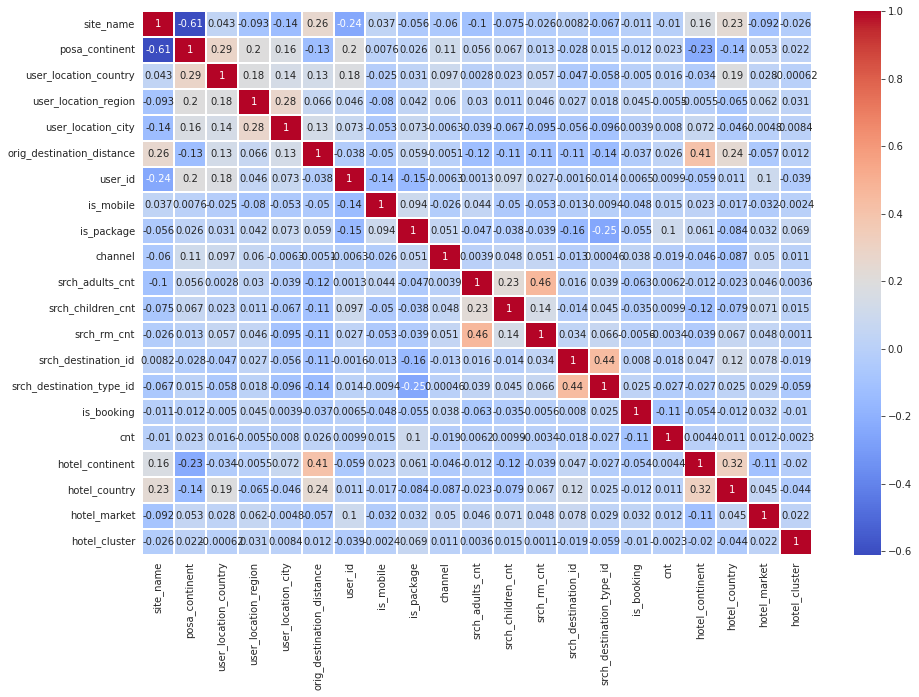

In [19]:
# heatmap
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
sns.heatmap(train_df.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

In [20]:
# Additional features from date columns
# stay_dur: number of duration of stay
# no_of_days_bet_booking: number of days between the booking and
# Cin_day: Check-in day
# Cin_month: Check-in moth
# Cin_year: Check-out year

In [21]:
# Function to convert date object into relevant attributes
def convert_date_into_days(df):
    df['srch_ci']=pd.to_datetime(df['srch_ci'])
    df['srch_co']=pd.to_datetime(df['srch_co'])
    df['date_time']=pd.to_datetime(df['date_time'])
    
    df['stay_dur'] = (df['srch_co'] - df['srch_ci']).astype('timedelta64[D]')
    df['no_of_days_bet_booking'] = (df['srch_ci'] - df['date_time']).astype('timedelta64[D]')
    
    # For hotel check-in
    # Month, Year, Day
    df['Cin_day'] = df["srch_ci"].apply(lambda x: x.day)
    df['Cin_month'] = df["srch_ci"].apply(lambda x: x.month)
    df['Cin_year'] = df["srch_ci"].apply(lambda x: x.year)

In [22]:
convert_date_into_days(train_df)
convert_date_into_days(test_df)
train_df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,stay_dur,no_of_days_bet_booking,Cin_day,Cin_month,Cin_year
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,3,2,50,628,1,4.0,15.0,27.0,8.0,2014.0
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,1,2,50,628,1,4.0,17.0,29.0,8.0,2014.0
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,1,2,50,628,1,4.0,17.0,29.0,8.0,2014.0
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,1,2,50,1457,80,5.0,105.0,23.0,11.0,2014.0
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,1,2,50,1457,21,5.0,105.0,23.0,11.0,2014.0


In [23]:
train_df.shape

(10000, 29)

In [24]:
train_df.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster', 'stay_dur', 'no_of_days_bet_booking', 'Cin_day',
       'Cin_month', 'Cin_year'],
      dtype='object')

/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Cin_month', ylabel='count'>

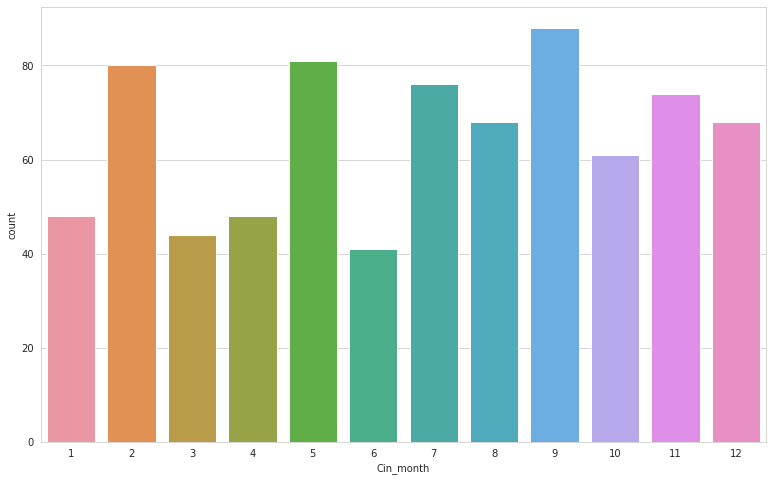

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(13,8)
sns.countplot('Cin_month', data=train_df[train_df["is_booking"]==1],order=list(range(1,13)),ax=ax)

/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Cin_day', ylabel='count'>

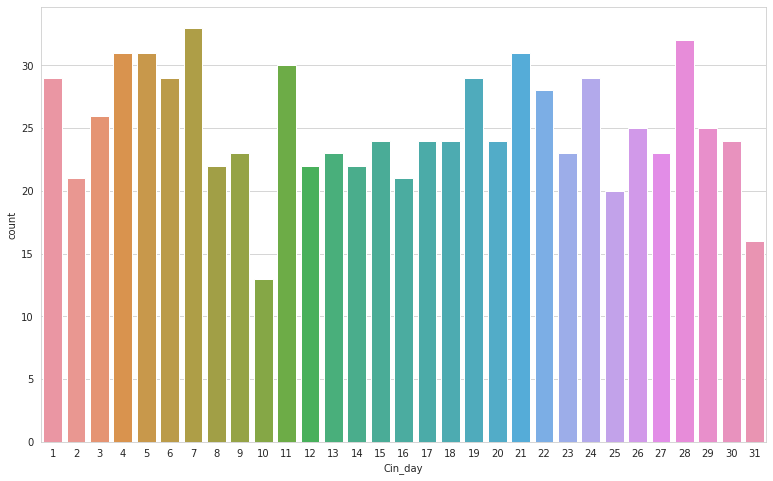

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(13,8)
sns.countplot('Cin_day', data=train_df[train_df["is_booking"]==1],order=list(range(1,32)),ax=ax)

/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='stay_dur', ylabel='count'>

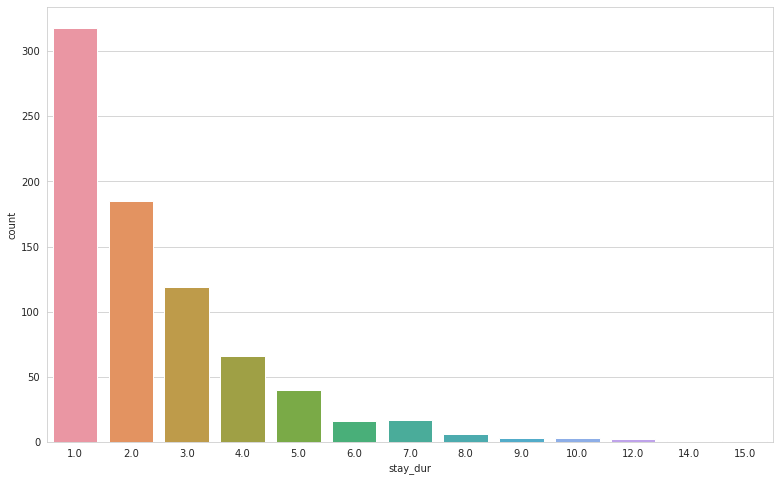

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot('stay_dur',data=train_df[train_df["is_booking"] == 1],ax=ax)

In [28]:
test_user_id = test_df['user_id']
columns=['date_time','srch_ci','user_id','srch_destination_type_id','srch_destination_id','site_name','user_location_region','user_location_city','srch_co','srch_adults_cnt','srch_children_cnt','srch_rm_cnt']

train_df.drop(columns=columns,axis=1,inplace=True)
test_df.drop(columns=columns,axis=1,inplace=True)

In [29]:
train_df.shape

(10000, 17)

In [30]:
test_df.shape

(10000, 15)

In [31]:
train_df.columns

Index(['posa_continent', 'user_location_country', 'orig_destination_distance',
       'is_mobile', 'is_package', 'channel', 'is_booking', 'cnt',
       'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster',
       'stay_dur', 'no_of_days_bet_booking', 'Cin_day', 'Cin_month',
       'Cin_year'],
      dtype='object')

In [32]:
test_df.columns

Index(['id', 'posa_continent', 'user_location_country',
       'orig_destination_distance', 'is_mobile', 'is_package', 'channel',
       'hotel_continent', 'hotel_country', 'hotel_market', 'stay_dur',
       'no_of_days_bet_booking', 'Cin_day', 'Cin_month', 'Cin_year'],
      dtype='object')

In [33]:
# Check the percentage of Nan in dataset
total = train_df.isnull().sum().sort_values(ascending=False)
total

orig_destination_distance    3729
Cin_year                        7
Cin_month                       7
Cin_day                         7
no_of_days_bet_booking          7
stay_dur                        7
hotel_country                   0
hotel_cluster                   0
hotel_market                    0
posa_continent                  0
user_location_country           0
cnt                             0
is_booking                      0
channel                         0
is_package                      0
is_mobile                       0
hotel_continent                 0
dtype: int64

In [34]:
percent = (train_df.isnull().sum()/train_df['hotel_cluster'].count()).sort_values(ascending=False)
percent

orig_destination_distance    0.3729
Cin_year                     0.0007
Cin_month                    0.0007
Cin_day                      0.0007
no_of_days_bet_booking       0.0007
stay_dur                     0.0007
hotel_country                0.0000
hotel_cluster                0.0000
hotel_market                 0.0000
posa_continent               0.0000
user_location_country        0.0000
cnt                          0.0000
is_booking                   0.0000
channel                      0.0000
is_package                   0.0000
is_mobile                    0.0000
hotel_continent              0.0000
dtype: float64

In [35]:
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data

,Total,Percent
orig_destination_distance,3729,0.3729
Cin_year,7,0.0007
Cin_month,7,0.0007
Cin_day,7,0.0007
no_of_days_bet_booking,7,0.0007
stay_dur,7,0.0007
hotel_country,0,0.0000
hotel_cluster,0,0.0000
hotel_market,0,0.0000
posa_continent,0,0.0000


In [36]:
# Fill average values in place for nan, fill  with mean
train_df['orig_destination_distance'].fillna(train_df['orig_destination_distance'].mean(),inplace=True)

In [37]:
train_df.isnull().sum()

posa_continent               0
user_location_country        0
orig_destination_distance    0
is_mobile                    0
is_package                   0
channel                      0
is_booking                   0
cnt                          0
hotel_continent              0
hotel_country                0
hotel_market                 0
hotel_cluster                0
stay_dur                     7
no_of_days_bet_booking       7
Cin_day                      7
Cin_month                    7
Cin_year                     7
dtype: int64

In [38]:
train_df['stay_dur']=train_df['stay_dur'].fillna(1.0)
train_df['Cin_day']=train_df['Cin_day'].fillna(26.0)
train_df['Cin_month']=train_df['Cin_month'].fillna(8.0)
train_df['Cin_year']=train_df['Cin_year'].fillna(2014.0)
train_df['no_of_days_bet_booking']=train_df['no_of_days_bet_booking'].fillna(0.0)

In [39]:
train_df.isnull().sum()

posa_continent               0
user_location_country        0
orig_destination_distance    0
is_mobile                    0
is_package                   0
channel                      0
is_booking                   0
cnt                          0
hotel_continent              0
hotel_country                0
hotel_market                 0
hotel_cluster                0
stay_dur                     0
no_of_days_bet_booking       0
Cin_day                      0
Cin_month                    0
Cin_year                     0
dtype: int64

In [40]:
train_df.drop(columns='is_booking',axis=1,inplace=True)
train_df.drop(columns='cnt',axis=1,inplace=True)
predictors = [c for c in train_df.columns if c not in ["hotel_cluster"]]
predictors

['posa_continent',
 'user_location_country',
 'orig_destination_distance',
 'is_mobile',
 'is_package',
 'channel',
 'hotel_continent',
 'hotel_country',
 'hotel_market',
 'stay_dur',
 'no_of_days_bet_booking',
 'Cin_day',
 'Cin_month',
 'Cin_year']

In [41]:
test_df[predictors].isnull().sum()

posa_continent                  0
user_location_country           0
orig_destination_distance    4107
is_mobile                       0
is_package                      0
channel                         0
hotel_continent                 0
hotel_country                   0
hotel_market                    0
stay_dur                        0
no_of_days_bet_booking          0
Cin_day                         0
Cin_month                       0
Cin_year                        0
dtype: int64

In [42]:
test_df['orig_destination_distance'].fillna(test_df['orig_destination_distance'].mean(),inplace=True)

In [43]:
clf = RandomForestClassifier(n_estimators=25, min_weight_fraction_leaf=0.1)
clf.fit(train_df[predictors], train_df['hotel_cluster'])
y_pred = clf.predict_proba(test_df[predictors])

In [44]:
y_pred.shape

(10000, 100)

In [45]:
id_test = test_df['id']

In [46]:
from collections import defaultdict
cluster = defaultdict(lambda: defaultdict(int))
for i in range(len(id_test)):
        data = sorted(y_pred[i], reverse = True)[0:5]
        cluster[id_test[i]] = data

In [47]:
cluster

defaultdict(<function __main__.<lambda>()>,
            {0: [0.04043877447006496,
              0.0365352373855712,
              0.03406405455757112,
              0.02792875913457663,
              0.027304226868890013],
             1: [0.028474018655696477,
              0.02609880597833477,
              0.02563621938055351,
              0.025382839082534855,
              0.0233421640871311],
             2: [0.043990708044309955,
              0.03485067046076091,
              0.029060594656195118,
              0.028004675823012623,
              0.027718788332888447],
             3: [0.0379289508634221,
              0.03296913558787295,
              0.028215505801149822,
              0.027608030036822533,
              0.0274496096227718],
             4: [0.04932575851279322,
              0.03286762294083544,
              0.0315910647708967,
              0.030770966444991686,
              0.030504306670551432],
             5: [0.04770402052623496,
              0.0

In [67]:
# Read in the train data using only the necessary columns. Specifying dtypes helps reduce memory requirements. The file is read in chunks of 1 million rows each. In each chunk we count the number of rows and number of bookings for every destination-hotel cluster combination.

train = pd.read_csv(path+'train.csv',dtype={'is_booking':bool,'srch_destination_id':np.int32,'hotel_cluster':np.int32},usecols=['srch_destination_id','is_booking','hotel_cluster'],chunksize=1000000)

In [49]:
y_pred

array([[0.00558326, 0.00138256, 0.01258762, ..., 0.0216709 , 0.00346261,
        0.02360153],
       [0.00525652, 0.00391468, 0.01043312, ..., 0.01896472, 0.00432826,
        0.0209993 ],
       [0.01169621, 0.01091822, 0.00558906, ..., 0.012641  , 0.01465012,
        0.00876178],
       ...,
       [0.0073259 , 0.00347572, 0.00937069, ..., 0.01595896, 0.0054397 ,
        0.01657654],
       [0.00321763, 0.00086268, 0.01494727, ..., 0.02110006, 0.0038212 ,
        0.0236177 ],
       [0.01159565, 0.00704252, 0.0117871 , ..., 0.01604749, 0.00701339,
        0.01558501]])

In [68]:
aggs=[]
for chunk in train:
    agg = chunk.groupby(['srch_destination_id','hotel_cluster'])['is_booking'].agg(['sum','count'])
    agg.reset_index(inplace=True)
    aggs.append(agg)
aggs=pd.concat(aggs,axis=0)
aggs.head()

,srch_destination_id,hotel_cluster,sum,count
0,1,20,0,2
1,1,30,0,1
2,1,60,0,2
3,4,22,1,2
4,4,25,1,2


In [51]:
CLICK_WEIGHT = 0.05
agg = aggs.groupby(['srch_destination_id','hotel_cluster']).sum().reset_index()
agg['count']-=agg['sum']
agg = agg.rename(columns = {'sum':'bookings','count':'clicks'})
agg['relevance']=agg['bookings']+CLICK_WEIGHT*agg['clicks']
agg.head()

,srch_destination_id,hotel_cluster,bookings,clicks,relevance
0,0,3,0,2,0.10
1,1,20,4,22,5.10
2,1,30,2,20,3.00
3,1,57,0,1,0.05
4,1,60,0,17,0.85


In [52]:
def most_popular(group, n_max=5):
    relevance = group['relevance'].values
    hotel_cluster = group['hotel_cluster'].values
    most_popular = hotel_cluster[np.argsort(relevance)[::-1]][:n_max]
    return np.array_str(most_popular)[1:-1] # remove square brackets

In [53]:
most_pop = agg.groupby(['srch_destination_id']).apply(most_popular)
most_pop = pd.DataFrame(most_pop).rename(columns={0:'hotel_cluster'})
most_pop.head()

,hotel_cluster
srch_destination_id,
0,3
1,20 30 60 57
2,20 30 53 46 41
3,53 60
4,82 25 32 58 78


In [54]:
test = pd.read_csv(path+'test.csv',dtype={'srch_destination_id':np.int32},usecols=['srch_destination_id'],)
test = test.merge(most_pop,how='left',left_on = 'srch_destination_id',right_index=True)
test.head()

,srch_destination_id,hotel_cluster
0,12243,5 55 37 11 22
1,14474,5
2,11353,0 31 77 91 96
3,8250,1 45 79 24 54
4,11812,91 42 2 48 59


In [55]:
test.hotel_cluster.isnull().sum()

14036

In [56]:
most_pop_all = agg.groupby('hotel_cluster')['relevance'].sum().nlargest(5).index
most_pop_all = np.array_str(most_pop_all)[1:-1]
print(most_pop_all)

91 48 42 59 28


In [57]:
test.hotel_cluster.fillna(most_pop_all,inplace=True)

In [58]:
test.hotel_cluster.to_csv('submission.csv',header=True,index_label='id')